# Деревья решений решают проблемы
__Суммарное количество баллов: 10__

Вы уже знакомы с классификацией методом KNN. В этом задании предстоит реализовать другой метод классификации - дерево решений. 

Одной из его особенностей является возможность объяснить в человекочитаемой форме, почему мы отнесли объект к определенному классу. Эта особенность позволяет использовать деревья решений для создания систем, которые могут подсказывать специалистам, на что именно стоит обратить внимание при принятии решений.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def read_cancer_dataset(path_to_csv_x, path_to_csv_y):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    X = pd.read_csv(path_to_csv_x, sep=",", index_col='Id')
    y = pd.read_csv(path_to_csv_y, sep=",", index_col='Id')
    return X, y

In [3]:
DATA_PATH_X = "C:/DiskD/Computer_Science_Center/Machine learning/hw3/x_spam_train.csv"
DATA_PATH_Y = "C:/DiskD/Computer_Science_Center/Machine learning/hw3/y_spam_train.csv"

In [4]:
X, y = read_cancer_dataset(DATA_PATH_X, DATA_PATH_Y)

In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
Id,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.220,0.0,0.000,0.000,0.000,2.000,12.0,34.0
1,0.00,0.00,0.29,0.0,0.88,0.14,0.00,0.0,0.88,0.0,...,0.0,0.0,0.097,0.0,0.388,0.048,0.024,2.264,49.0,428.0
2,0.00,0.00,0.00,0.0,1.03,0.00,1.03,0.0,0.00,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,4.000,60.0,84.0
3,0.00,0.57,0.57,0.0,0.14,0.14,0.00,0.0,0.14,0.0,...,0.0,0.0,0.000,0.0,0.156,0.000,0.000,1.394,6.0,159.0
4,2.27,0.00,2.27,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.401,0.0,0.000,0.000,0.000,1.000,1.0,5.0


In [6]:
y.head()

,Expected
Id,
0,0
1,1
2,1
3,1
4,0


In [7]:
y['Expected'].unique()

array([0, 1], dtype=int64)

In [8]:
# Количество пропусков в столбцах (все хорошо)
NAs = pd.concat([X.isnull().sum()], axis=1)
NAs

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [9]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.106049,0.217628,0.276321,0.050329,0.304655,0.097223,0.111823,0.105810,0.093095,0.242245,...,0.035315,0.039567,0.140051,0.017457,0.274343,0.077131,0.047601,5.453348,54.117663,284.603804
std,0.304741,1.311986,0.497139,1.172894,0.659563,0.281872,0.385999,0.415282,0.285621,0.663318,...,0.312451,0.241810,0.281716,0.118050,0.866073,0.248472,0.474210,34.884169,210.722719,583.300892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.064500,0.000000,0.000000,0.000000,0.000000,2.280000,15.000000,95.000000
75%,0.000000,0.000000,0.410000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.000000,0.188000,0.000000,0.312250,0.054000,0.000000,3.750000,43.000000,272.000000
max,4.340000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.367000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000


In [10]:
# Сбалансированность хорошая
y.value_counts()

Expected
0           2231
1           1449
dtype: int64

In [11]:
y = y['Expected']

In [12]:
X.index.name = None

In [13]:
y.index.name = None

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>,
       <AxesSubplot:title={'center':'17'}>,
       <AxesSubplot:title={'center':'18'}>,
       <AxesSubplot:title={'center':'19'}>,
       <AxesSubplot:title={'center':'20'}>,
       <AxesSubplot:title={'center':'21'}>,
       <AxesSubplot:title={'center':'22'}>

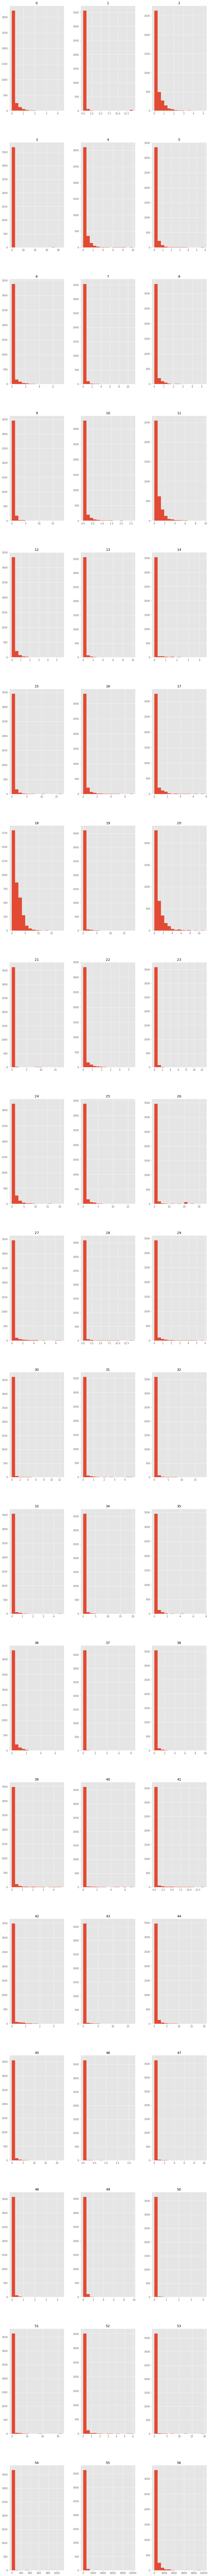

In [14]:
# Очень много выбросов
matplotlib.style.use('ggplot')
%matplotlib inline

fig, axes = plt.subplots(19, 3, figsize=(15,200))
X.hist(ax=axes, bins=15)

In [15]:
# Пороги
conditions = ' | '.join([f'(X["{str(i)}"] > X["{str(i)}"].quantile(.99))' for i in range(57)])

In [16]:
# Количество выбросов примерное
print(len(X[eval(conditions)]))

1351


Избавляться от выбросов нельзя, их много, но деревья с этим справятся. kNN будет плохо работать в такой ситуации. Возможно, стоит изменить значения точек по признакам, но это тоже сильно изменит данные, учитывая количество выбросов. В реальности я бы попросил еще данных, если же нет, то для kNN попытался бы сгладить выбросы квантилями по признакам, а лучше вообще не применять kNN в такой ситуации.

In [17]:
def train_test_split(X, y, ratio):
    # Возвращает X_train, y_train, X_test, y_test
    # X_train и X_test - массив векторов - две части массива X, разделенного в состветсви с коэффициентом ratio
    # y_train и y_test - соответствующие X_train и X_test метки классов

    train_indexes = random.sample(range(len(y)), int(ratio * len(y)))
    test_indexes = list(set(range(len(y))) - set(train_indexes))
    
    X_train = X.loc[train_indexes]
    X_test = X.loc[test_indexes]
    y_train = y[train_indexes]
    y_test = y[test_indexes]
    
    return X_train, y_train, X_test, y_test

In [18]:
def get_precision_recall_accuracy(y_pred, y_true):
    # Возвращает precision, recall и accuracy
    # precision - набор значений метрики precision для каждого класса
    # recall - набор значений метрики recall для каждого класса
    # accuracy - число, отражающее общую точность предсказания
    # T - True, F - False, P - Positive, N - Negative
    FP = np.sum(y_pred > y_true)
    FN = np.sum(y_pred < y_true)
    TP = np.sum(np.logical_and(y_pred == y_true, y_true > 0))
    TN = np.sum(np.logical_and(y_pred == y_true, y_true == 0))
    
    precision = [0, 0]
    recall = [0, 0]
    if TN > 0:
        precision[0] = TN / (TN + FN)
        recall[0] = TN / (TN + FP)
    if TP > 0:
        precision[1] = TP / (TP + FP)
        recall[1] = TP / (TP + FN)
    
    accuracy = (TP + TN) / len(y_true)
    
    return precision, recall, accuracy

Во время построения дерева решений нам потребуется определить, какой из предикатов лучше всего разбивает обучающую выборку. Есть два критерия, которые позволяют это сделать: критерий Джини и энтропийный критерий. Первый для подсчета информативности разбиения использует коэффициент Джини, второй - энтропию. Реализуйте подсчет этих коэффициентов, а так же подсчет информативности разбиения. 

#### Описание функций
`gini(x)` считает коэффициент Джини для массива меток

`entropy(x)` считает энтропию для массива меток

`gain(left_y, right_y, criterion)` считает информативность разбиения массива меток на левую `left_y` и правую `right_y` части при помощи `criterion`, который задается функцией (не строкой).

In [19]:
def gini(x):
    classes, sizes = np.unique(x, return_counts=True)
    ans = 0
    for size in sizes:
        ans += size / len(x) * (1 - size / len(x))
    return ans
    
def entropy(x):
    classes, sizes = np.unique(x, return_counts=True)
    ans = 0
    for size in sizes:
        ans -= size / len(x) * np.log2(size / len(x))
    return ans

def gain(left_y, right_y, criterion):
    total = np.concatenate((left_y, right_y))
    return criterion(total) - (len(left_y) * criterion(left_y) + len(right_y) * criterion(right_y)) / len(total)

Деревья решений имеют хорошую интерпретируемость, т.к. позволяют не только предсказать класс, но и объяснить, почему мы предсказали именно его. Например, мы можем его нарисовать. Чтобы сделать это, нам необходимо знать, как оно устроено внутри. Реализуйте классы, которые будут задавать структуру дерева. 

#### DecisionTreeLeaf
Поля:
1. `y` должно содержать класс, который встречается чаще всего среди элементов листа дерева

#### DecisionTreeNode
В данной домашней работе мы ограничемся порядковыми и количественными признаками, поэтому достаточно хранить измерение и значение признака, по которому разбиваем обучающую выборку.

Поля:
1. `split_dim` измерение, по которому разбиваем выборку
2. `split_value` значение, по которому разбираем выборку
3. `left` поддерево, отвечающее за случай `x[split_dim] <= split_value`. Может быть `DecisionTreeNode` или `DecisionTreeLeaf`
4. `right` поддерево, отвечающее за случай `x[split_dim] > split_value`. Может быть `DecisionTreeNode` или `DecisionTreeLeaf`

__Интерфейс классов можно и нужно менять при необходимости__ (например, для вычисления вероятности в следующем задании)

In [20]:
class DecisionTreeLeaf:
    def __init__(self, y, leaf_classes):
        self.y = y
        self.classes = leaf_classes

class DecisionTreeNode:
    def __init__(self, split_dim, split_value, node_classes, left=None, right=None):
        self.split_dim = split_dim
        self.split_value = split_value
        self.left = left
        self.right = right
        self.classes = node_classes

Теперь перейдем к самому дереву решений. Реализуйте класс `DecisionTreeClassifier`.

#### Описание методов
`fit(X, y)` строит дерево решений по обучающей выборке.

`predict_proba(X)` для каждого элемента из `X` возвращает словарь `dict`, состоящий из пар `(класс, вероятность)`. Вероятности классов в листе можно определить через количество объектов соответствующего класса в листе. 

#### Описание параметров конструктора
`criterion="gini"` - задает критерий, который будет использоваться при построении дерева. Возможные значения: `"gini"`, `"entropy"`.

`max_depth=None` - ограничение глубины дерева. Если `None` - глубина не ограничена

`min_samples_leaf=1` - минимальное количество элементов в каждом листе дерева.

#### Описание полей
`root` - корень дерева. Может быть `DecisionTreeNode` или `DecisionTreeLeaf`

In [21]:
class DecisionTreeClassifier:
    def __init__(self, criterion="gini", max_depth=None, min_samples_leaf=1, min_samples_split=2):
        self.root = None
        self.criterion = criterion
        self.crit = {'gini': gini, 'entropy': entropy}
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.classes = 1
    
    def fit(self, X, y, depth=0, parent=None, direction=None):
        classes, sizes = np.unique(y, return_counts=True)
        if depth == 0:
            self.classes = classes
        my_classes = {cl: 0 for cl in self.classes}
        for i, cl in enumerate(classes):
            my_classes[cl] = sizes[i]
        if (self.max_depth is None or self.max_depth > depth) and len(classes) > 1 and len(y) >= self.min_samples_split:
            split_dim, split_value, gain_value = -1, 0, -3 * np.log2(len(classes))
            for dim in X.columns:
                for split in X[dim].unique():
                    left = X[X[dim] <= split].index
                    right = X[X[dim] > split].index
                    if len(left) >= self.min_samples_leaf and len(right) >= self.min_samples_leaf:
                        my_gain = gain(y[left], y[right], self.crit[self.criterion])
                        if my_gain > gain_value:
                            gain_value = my_gain
                            split_dim = dim
                            split_value = split              
            if split_dim == -1:
                if depth == 0:
                    self.root = DecisionTreeLeaf(classes[np.argmax(sizes)], my_classes)
                else:
                    if direction:
                        parent.right = DecisionTreeLeaf(classes[np.argmax(sizes)], my_classes)
                    else:
                        parent.left = DecisionTreeLeaf(classes[np.argmax(sizes)], my_classes)
            else:
                X_left = X[X[split_dim] <= split_value]
                X_right = X[X[split_dim] > split_value]
                y_left = y[X_left.index]
                y_right = y[X_right.index]
                if depth == 0:
                    self.root = DecisionTreeNode(split_dim, split_value, my_classes)
                    self.fit(X_left, y_left, depth + 1, self.root, 0)
                    self.fit(X_right, y_right, depth + 1, self.root, 1)
                else:
                    if direction:
                        parent.right = DecisionTreeNode(split_dim, split_value, my_classes)
                        self.fit(X_left, y_left, depth + 1, parent.right, 0)
                        self.fit(X_right, y_right, depth + 1, parent.right, 1)
                    else:
                        parent.left = DecisionTreeNode(split_dim, split_value, my_classes)
                        self.fit(X_left, y_left, depth + 1, parent.left, 0)
                        self.fit(X_right, y_right, depth + 1, parent.left, 1)

        else:
            if depth == 0:
                self.root = DecisionTreeLeaf(classes[np.argmax(sizes)], my_classes)
            else:
                if direction:
                    parent.right = DecisionTreeLeaf(classes[np.argmax(sizes)], my_classes)
                else:
                    parent.left = DecisionTreeLeaf(classes[np.argmax(sizes)], my_classes)
    
    def predict_proba(self, X):
        my_probabilities = [0 for _ in range(len(X))]
        for i, ind in enumerate(X.index):
            node = self.root
            while isinstance(node, DecisionTreeNode):
                if X[node.split_dim][ind] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            my_probabilities[i] = {cl: node.classes[cl] / sum(node.classes.values()) for cl in node.classes}
        return my_probabilities
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return [max(p.keys(), key=lambda k: p[k]) for p in proba]

Построенное дерево можно нарисовать. Метод `draw_tree` рисует дерево и сохраняет его в указанный файл.

In [22]:
def tree_depth(tree_root):
    if isinstance(tree_root, DecisionTreeNode):
        return max(tree_depth(tree_root.left), tree_depth(tree_root.right)) + 1
    else:
        return 1

def draw_tree_rec(tree_root, x_left, x_right, y):
    x_center = (x_right - x_left) / 2 + x_left
    if isinstance(tree_root, DecisionTreeNode):
        x_center = (x_right - x_left) / 2 + x_left
        x = draw_tree_rec(tree_root.left, x_left, x_center, y - 1)
        plt.plot((x_center, x), (y - 0.1, y - 0.9), c=(0, 0, 0))
        x = draw_tree_rec(tree_root.right, x_center, x_right, y - 1)
        plt.plot((x_center, x), (y - 0.1, y - 0.9), c=(0, 0, 0))
        plt.text(x_center, y, "x[%i] <= %f" % (int(tree_root.split_dim), tree_root.split_value),
                horizontalalignment='center')
    else:
        plt.text(x_center, y, str(tree_root.y),
                horizontalalignment='center')
    return x_center

def draw_tree(tree, save_path=None):
    td = tree_depth(tree.root)
    plt.figure(figsize=(0.33 * 2 ** td, 2 * td))
    plt.xlim(-1, 1)
    plt.ylim(0.95, td + 0.05)
    plt.axis('off')
    draw_tree_rec(tree.root, -1, 1, td)
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

Для двумерного набора данных дерево можно отобразить на плоскости с данными. Кроме того, как и для любого классификатора, для него можно построить roc-кривую

In [23]:
def plot_roc_curve(y_test, p_pred):
    positive_samples = sum(1 for y in y_test if y == 0)
    tpr = []
    fpr = []
    for w in np.arange(-0.01, 1.02, 0.01):
        y_pred = [(0 if p.get(0, 0) > w else 1) for p in p_pred]
        tpr.append(sum(1 for yp, yt in zip(y_pred, y_test) if yp == 0 and yt == 0) / positive_samples)
        fpr.append(sum(1 for yp, yt in zip(y_pred, y_test) if yp == 0 and yt != 0) / (len(y_test) - positive_samples))
    plt.figure(figsize = (7, 7))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.tight_layout()
    plt.show()

def rectangle_bounds(bounds):
    return ((bounds[0][0], bounds[0][0], bounds[0][1], bounds[0][1]), 
            (bounds[1][0], bounds[1][1], bounds[1][1], bounds[1][0]))

def plot_2d_tree(tree_root, bounds, colors):
    if isinstance(tree_root, DecisionTreeNode):
        if tree_root.split_dim:
            plot_2d_tree(tree_root.left, [bounds[0], [bounds[1][0], tree_root.split_value]], colors)
            plot_2d_tree(tree_root.right, [bounds[0], [tree_root.split_value, bounds[1][1]]], colors)
            plt.plot(bounds[0], (tree_root.split_value, tree_root.split_value), c=(0, 0, 0))
        else:
            plot_2d_tree(tree_root.left, [[bounds[0][0], tree_root.split_value], bounds[1]], colors)
            plot_2d_tree(tree_root.right, [[tree_root.split_value, bounds[0][1]], bounds[1]], colors)
            plt.plot((tree_root.split_value, tree_root.split_value), bounds[1], c=(0, 0, 0))
    else:
        x, y = rectangle_bounds(bounds)
        plt.fill(x, y, c=colors[tree_root.y] + [0.2])

def plot_2d(tree, X, y):
    plt.figure(figsize=(9, 9))
    colors = dict((c, list(np.random.random(3))) for c in np.unique(y))
    bounds = list(zip(np.min(X, axis=0), np.max(X, axis=0)))
    plt.xlim(*bounds[0])
    plt.ylim(*bounds[1])
    plot_2d_tree(tree.root, list(zip(np.min(X, axis=0), np.max(X, axis=0))), colors)
    for c in np.unique(y):
        plt.scatter(X[y==c, 0], X[y==c, 1], c=[colors[c]], label=c)
    plt.legend()
    plt.tight_layout()
    plt.show()


Протестируйте решение на датасете spam.
Для этой задачи используйте данные x_spam_train и y_spam_train:
1. Выполните загрузку и предобработку файлов x_spam_train и y_spam_train.
2. Разбейте x_spam_train и y_spam_train на x_train, y_train, x_test и y_test для оценки точности работы алгоритма.
3. Посчитайте метрики `precision`, `recall`, `accuracy` для модели Decision Tree. Если необходимо, попробуйте разные наборы параметров для получения лучшего результата.
4. Сравните значения метрик с результатами модели kNN из предыдущего задания (можно использовать реализацию из библиотеки `sklearn`).
5. Ответьте на следующие вопросы:
    - Какой нужен препроцессинг данных для моделей?
    - Какая модель делает предсказания лучше?  Предположите, почему.

_Ваш ответ_

Про препроцессинг писал выше. Я отдаю свой голос DecisionTreeClassifier, потому что он лучше на test, хоть и немного, а также соотношение train/test лучше. Но я удивлен, kNN затащил:)

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Удаляю неинформативные признаки, я посмотрел, как их оценивает встроенный DecisionTreeClassifier
X1 = X.drop(X.columns[[0, 1, 3, 7, 8, 9, 10, 12, 13, 14, 19, 21, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50, 53, 56]], axis=1)

([0.9045138888888888, 0.9156976744186046], [0.9472727272727273, 0.8513513513513513], 0.908695652173913)


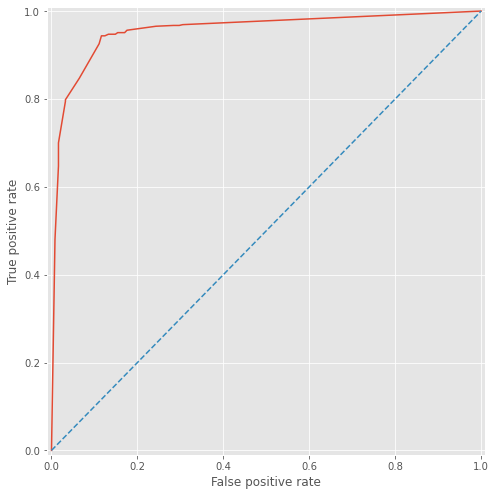

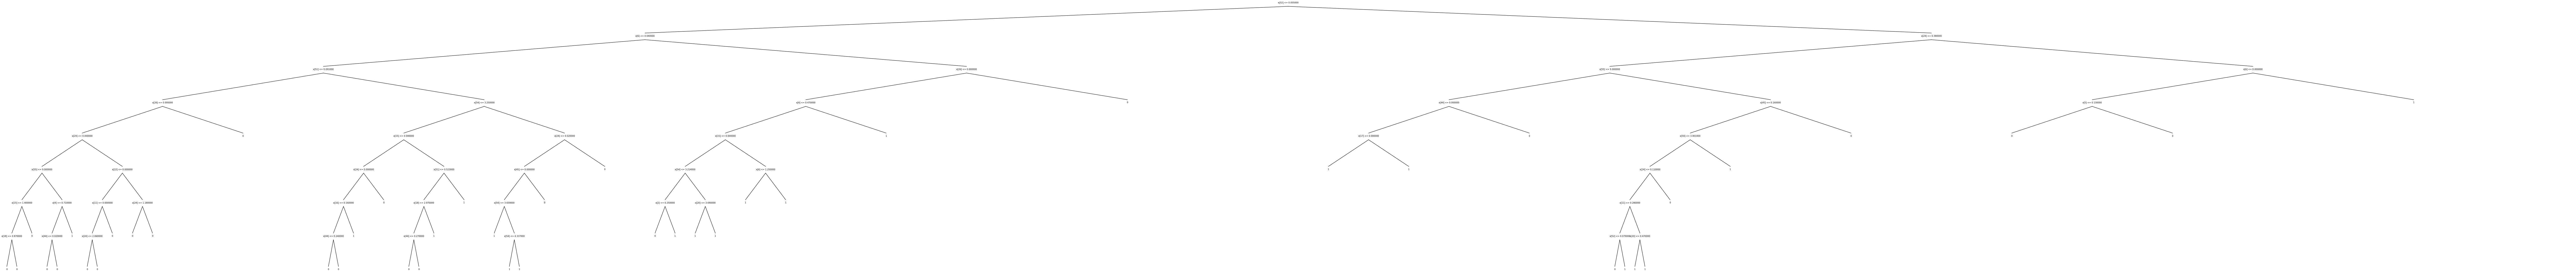

In [26]:
random.seed(a=1234)
#X_train, y_train, X_test, y_test = train_test_split(X1, y, 0.75)
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state = 1234)

# Оптимальные значения тоже посмотрел с помощью GridSearchCV и DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=8, min_samples_leaf=3, min_samples_split=20)
tree.fit(X_train, y_train)
print(get_precision_recall_accuracy(tree.predict(X_test), y_test))
plot_roc_curve(y_test, tree.predict_proba(X_test))
draw_tree(tree)

1. Обучите модель на всех данных из x_spam_train и y_spam_train.
2. Сделайте submit своего решения и получите значение f1_score не менее 0.6

In [27]:
print(get_precision_recall_accuracy(tree.predict(X_train), y_train))

([0.9188888888888889, 0.971875], [0.9839381320642475, 0.8646895273401297], 0.9373188405797102)


In [28]:
test = pd.read_csv("C:/DiskD/Computer_Science_Center/Machine learning/hw3/x_spam_test.csv", sep=",", index_col='Id')

In [29]:
test1 = test.drop(test.columns[[0, 1, 3, 7, 8, 9, 10, 12, 13, 14, 19, 21, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50, 53, 56]], axis=1)

In [30]:
submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = test1.index
submission["Expected"] = tree.predict(test1)
submission.to_csv('C:/DiskD/Computer_Science_Center/Machine learning/hw3/submission.csv', index=False)


In [31]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [32]:
# Выжмем из kNN все соки:)
from sklearn.model_selection import GridSearchCV

In [37]:
# Определяем тестируемые значения гиперпараметров
params_set = {
'n_neighbors': range(5, 51, 5),
'weights': ['uniform', 'distance'],
'leaf_size': range(10, 61, 10),
'p': range(1, 7),
}

In [38]:
# Проводим 5-fold кросс-валидацию
# Качество моделей сравниваем с помощью accuracy, так как классы сбалансированы
grid_CV_1 = GridSearchCV(estimator=neigh,
       param_grid=params_set,
       scoring='accuracy',
       cv=5,
       n_jobs=-1)


# Обучение на обучающей выборке
grid_CV_1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'leaf_size': range(10, 61, 10),
                         'n_neighbors': range(5, 51, 5), 'p': range(1, 7),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [39]:
best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [40]:
# Значение критерия качества для лучших значений гиперпараметров 
best_CV_score = grid_CV_1.best_score_
print('Лучшее accuracy', best_CV_score)

Лучшее accuracy 0.898913043478261


In [41]:
# Лучшая модель
best_model = grid_CV_1.best_estimator_

# accuracy на тестовом множестве для лучшей модели
test_acc = best_model.score(X_test,y_test)

# Значение критерия качества для лучших значений гиперпараметров
print('Лучшее accuracy на тестовом множестве', test_acc)

Лучшее accuracy на тестовом множестве 0.9043478260869565


In [42]:
# Строим предсказание модели
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [43]:
# Точность модели на обучающем и тестовом множестве
print(f"Accuracy on train set is {accuracy_score(y_train, y_pred_train)*100}%")
print(f"Accuracy on test set is {accuracy_score(y_test, y_pred_test)*100}%")

Accuracy on train set is 99.92753623188406%
Accuracy on test set is 90.43478260869566%
